In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import load_experiments

from experiment import experiments_to_df

from analysis import extract_needed

pd.set_option('display.max_rows', None)

In [3]:
experiments_10, df_10 = load_experiments('../results/experim_10.json')

experiments_14, df_14 = load_experiments('../results/experim_14.json')

experiments_21, df_21 = load_experiments('../results/experim_21.json')
experiments_22, df_22 = load_experiments('../results/experim_22.json')

experiments_26, df_26 = load_experiments('../results/experim_26.json')
experiments_27, df_27 = load_experiments('../results/experim_27.json')

experiments_34, df_34 = load_experiments('../results/experim_34.json')
experiments_35, df_35 = load_experiments('../results/experim_35.json')

experiments_41, df_41 = load_experiments('../results/experim_41.json')

experiments_44, df_44 = load_experiments('../results/experim_44.json')
experiments_45, df_45 = load_experiments('../results/experim_45.json')
experiments_46, df_46 = load_experiments('../results/experim_46.json')


In [4]:
noise_experiments = experiments_10 + experiments_14 + experiments_21 + experiments_22 + experiments_26 + \
experiments_27 + experiments_41 + experiments_34 + experiments_35 + experiments_44 + experiments_45 + experiments_46

In [5]:
noise_df = experiments_to_df(noise_experiments)

In [6]:
table = noise_df[(noise_df["weight_function"] == weight_hypers["simple_101"].repr) 
& (noise_df["train_window"] == 10) & (0.01 < noise_df["noise_var"]) & (noise_df["noise_var"] < 100)]
# print(table[["noise_var", "mixing_type", "mean"]].to_latex(float_format="%.2f", index=False))
table[["noise_var", "mixing_type", "mean"]]

,noise_var,mixing_type,mean
86,0.1,decaying past,131348.25
105,0.1,increasing past,114564.74
25,0.1,start,131578.01
70,0.1,uniform past,115927.25
63,1,decaying past,123066.72
126,1,increasing past,110438.09
7,1,start,132268.30
48,1,uniform past,110569.83
89,2,decaying past,109753.81
108,2,increasing past,105398.29


In [7]:
table.mixing_type.unique()

array(['decaying past', 'increasing past', 'start', 'uniform past'],
      dtype=object)

In [8]:
dct = {mt: table[table["mixing_type"] == mt]["mean"].values for mt in table.mixing_type.unique()}

In [9]:
grid = table[table["mixing_type"] == "start"]["noise_var"].values

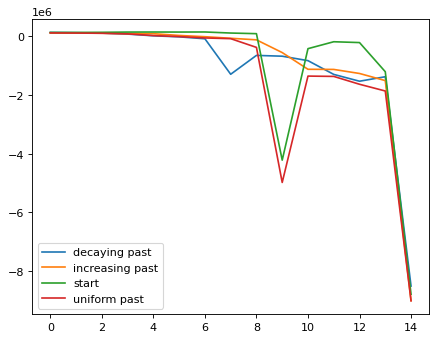

In [10]:
for key, vals in dct.items():
    # plt.yscale("log")
    plt.plot(vals[:-1], label=key)
plt.legend()